In [1]:
import traffic.core
import pandas as pd
import numpy as np
import geopandas as gpd
from glob import glob

In [2]:
tfc_df = pd.read_pickle('../data/bgaladder/bgaladder_raw_2019.pkl.bz2')
tfc_df = tfc_df[tfc_df['altitude'] >= 0]
tfc_df['altitude'] = tfc_df['altitude'] / 3.28084
tfc_clean = traffic.core.Traffic(tfc_df)
tfc_df

,timestamp,latitude,longitude,altitude,vertical_rate,flight_id,squawk,callsign,onground,spi,alert,icao24
15,2019-01-01 12:09:10,56.1875,-3.332031,88.6875,19.34375,10651,None,10651.0,False,False,False,10651.0
16,2019-01-01 12:09:30,56.1875,-3.339844,179.7500,8.96875,10651,None,10651.0,False,False,False,10651.0
17,2019-01-01 12:09:50,56.1875,-3.347656,153.8750,-2.550781,10651,None,10651.0,False,False,False,10651.0
18,2019-01-01 12:10:10,56.1875,-3.351562,139.0000,-1.469727,10651,None,10651.0,False,False,False,10651.0
19,2019-01-01 12:10:30,56.1875,-3.353516,132.0000,-0.689941,10651,None,10651.0,False,False,False,10651.0
...,...,...,...,...,...,...,...,...,...,...,...,...
691,2020-01-01 13:34:29,57.0625,-2.824219,187.7500,-4.738281,17841,None,17841.0,False,False,False,17841.0
692,2020-01-01 13:34:49,57.0625,-2.832031,132.8750,-5.398438,17841,None,17841.0,False,False,False,17841.0
693,2020-01-01 13:35:09,57.0625,-2.839844,96.9375,-3.539062,17841,None,17841.0,False,False,False,17841.0
694,2020-01-01 13:35:29,57.0625,-2.843750,100.8750,0.389893,17841,None,17841.0,False,False,False,17841.0


In [3]:
tfc_gdf = gpd.GeoDataFrame(tfc_clean.data,
                           geometry=gpd.points_from_xy(tfc_clean.data['longitude'], tfc_clean.data['latitude'],
                                                       tfc_clean.data['altitude']), crs='epsg:4326')

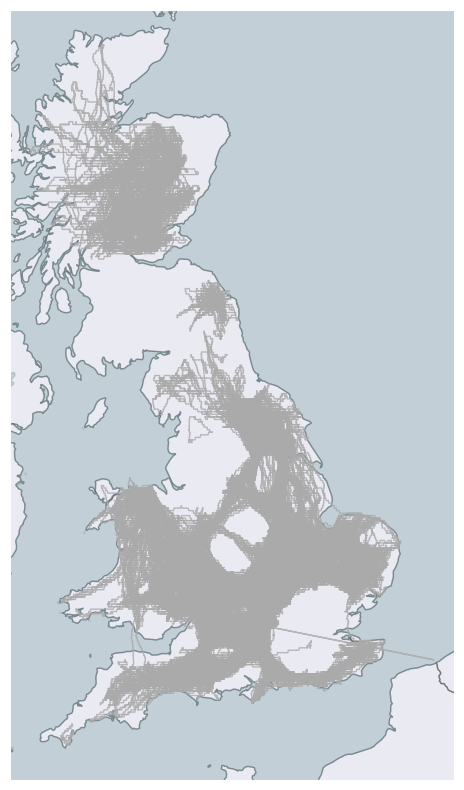

In [4]:
import matplotlib.pyplot as plt
from cartopy.crs import Projection
from traffic.drawing import countries, lakes, ocean

fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=Projection('epsg:3857')))
ax.add_feature(countries())
ax.add_feature(lakes())
ax.add_feature(ocean())
tfc_clean.plot(ax, transform=Projection('epsg:4326'))

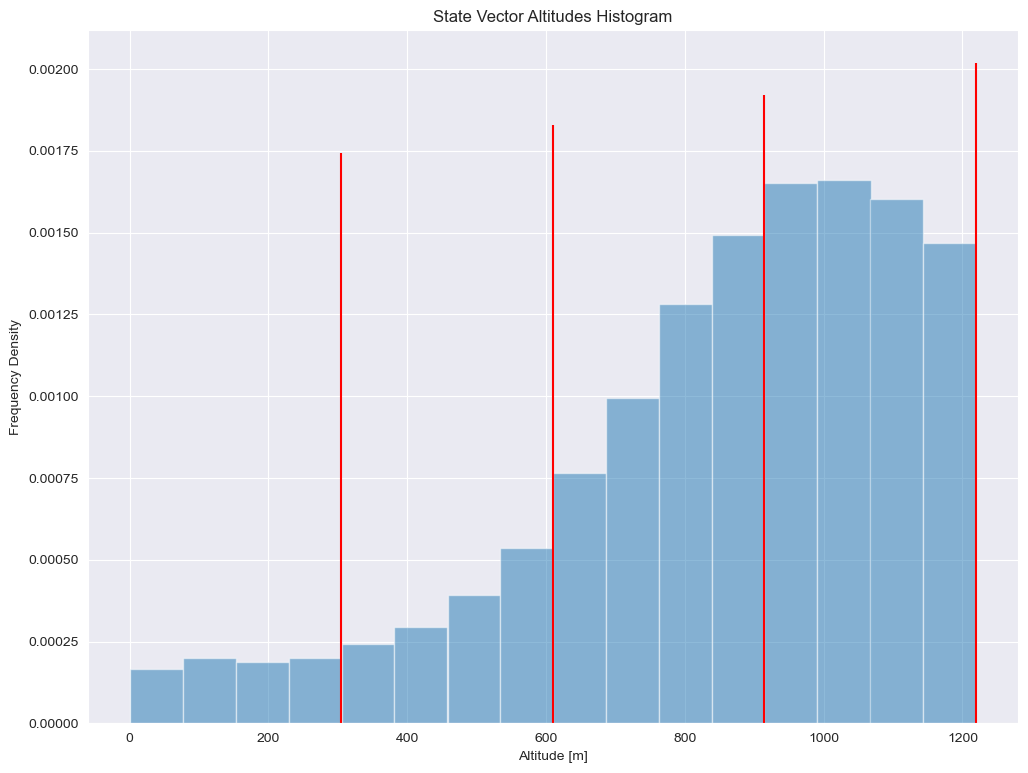

In [5]:
hist_args = dict(alpha=0.5, bins=16, density=True)
fig = plt.figure(figsize=(12, 9))
col_name = 'altitude'
# proj_1s_tfc.data[(proj_1s_tfc.data[col_name] < 1220) & (proj_1s_tfc.data[col_name] > 0)][col_name].hist(**hist_args,
#                                                                                                         label='1sec sample rate')
# proj_10s_tfc.data[(proj_10s_tfc.data[col_name] < 1220) & (proj_10s_tfc.data[col_name] > 0)][col_name].hist(**hist_args,
#                                                                                                            label='10sec sample rate')
tfc_clean.data[(tfc_clean.data[col_name] < 1220) & (tfc_clean.data[col_name] > 0)][col_name].hist(**hist_args, label='60sec sample rate')

plt.gca().set(title='State Vector Altitudes Histogram', ylabel='Frequency Density', xlabel='Altitude [m]')
plt.vlines(304.8, *plt.ylim(), 'r')
plt.vlines(304.8 * 2, *plt.ylim(), 'r')
plt.vlines(304.8 * 3, *plt.ylim(), 'r')
plt.vlines(304.8 * 4, *plt.ylim(), 'r')
# plt.legend()

[Text(0.5, 1.0, 'Traffic Data Boxplots')]

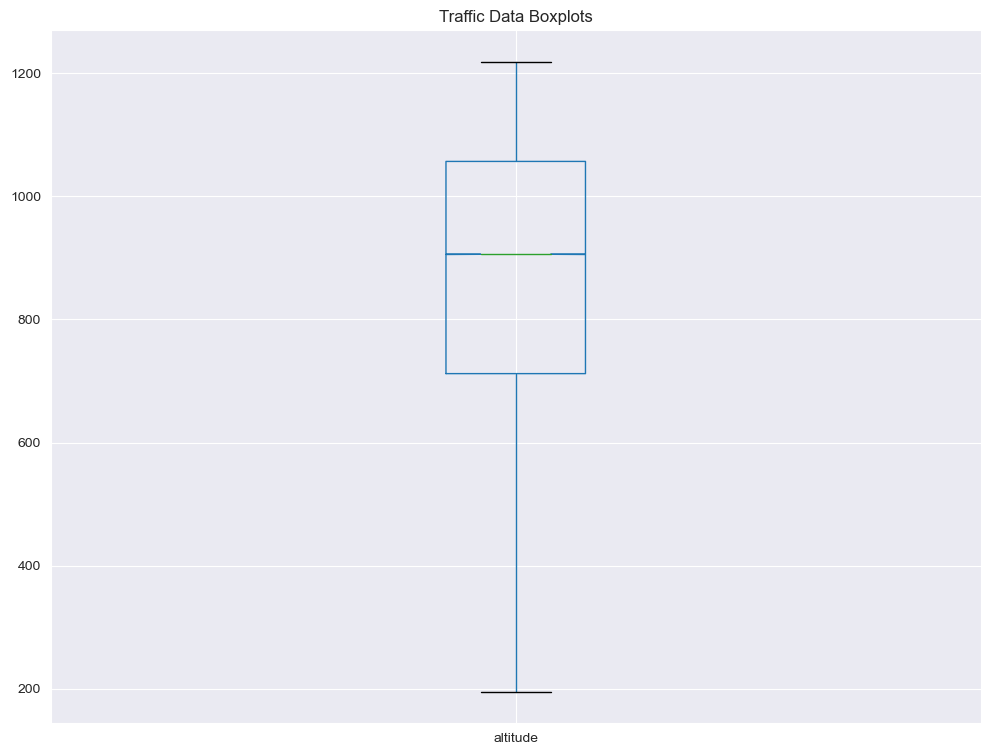

In [6]:
fig = plt.figure(figsize=(12, 9))
col_name = 'altitude'
# proj_1s_tfc.data[(proj_1s_tfc.data[col_name] < 1220) & (proj_1s_tfc.data[col_name] > 0)][col_name].hist(**hist_args,
#                                                                                                         label='1sec sample rate')
# proj_10s_tfc.data[(proj_10s_tfc.data[col_name] < 1220) & (proj_10s_tfc.data[col_name] > 0)][col_name].hist(**hist_args,
#                                                                                                            label='10sec sample rate')
tfc_clean.data[(tfc_clean.data[col_name] < 1220) & (tfc_clean.data[col_name] > 0)].boxplot(
    column=['altitude'], notch=True, sym='')

plt.gca().set(title='Traffic Data Boxplots')

In [7]:
res = 6000
tfc_xy = tfc_clean.compute_xy('epsg:3857')
tfc_agg = tfc_xy.data.assign(
    x=lambda elt: (elt.x // res) * res,
    y=lambda elt: (elt.y // res) * res,
).groupby(["x", "y"]).agg(altitude_mean=pd.NamedAgg('altitude', np.nanmean),
                          altitude_std=pd.NamedAgg('altitude', np.std),
                          flight_id_nunique=('flight_id', 'nunique'))

In [8]:
tfc_agg

altitude_mean  altitude_std  flight_id_nunique
x         y                                                        
-660000.0 7812000.0        3624.00     32.952491                  1
          7824000.0        3682.00    147.540415                  1
          7830000.0        3988.00      8.485281                  1
-654000.0 7812000.0        2652.00    249.350208                  1
          7824000.0        3062.00    439.932679                  1
...                            ...           ...                ...
 192000.0 6906000.0        1038.00    184.574069                  4
          6912000.0        1081.00    223.019535                  1
          6918000.0         979.00    197.934754                  2
 198000.0 6912000.0        1343.00           NaN                  1
 270000.0 6642000.0         219.75           NaN                  1

[10454 rows x 3 columns]

<Axes:>

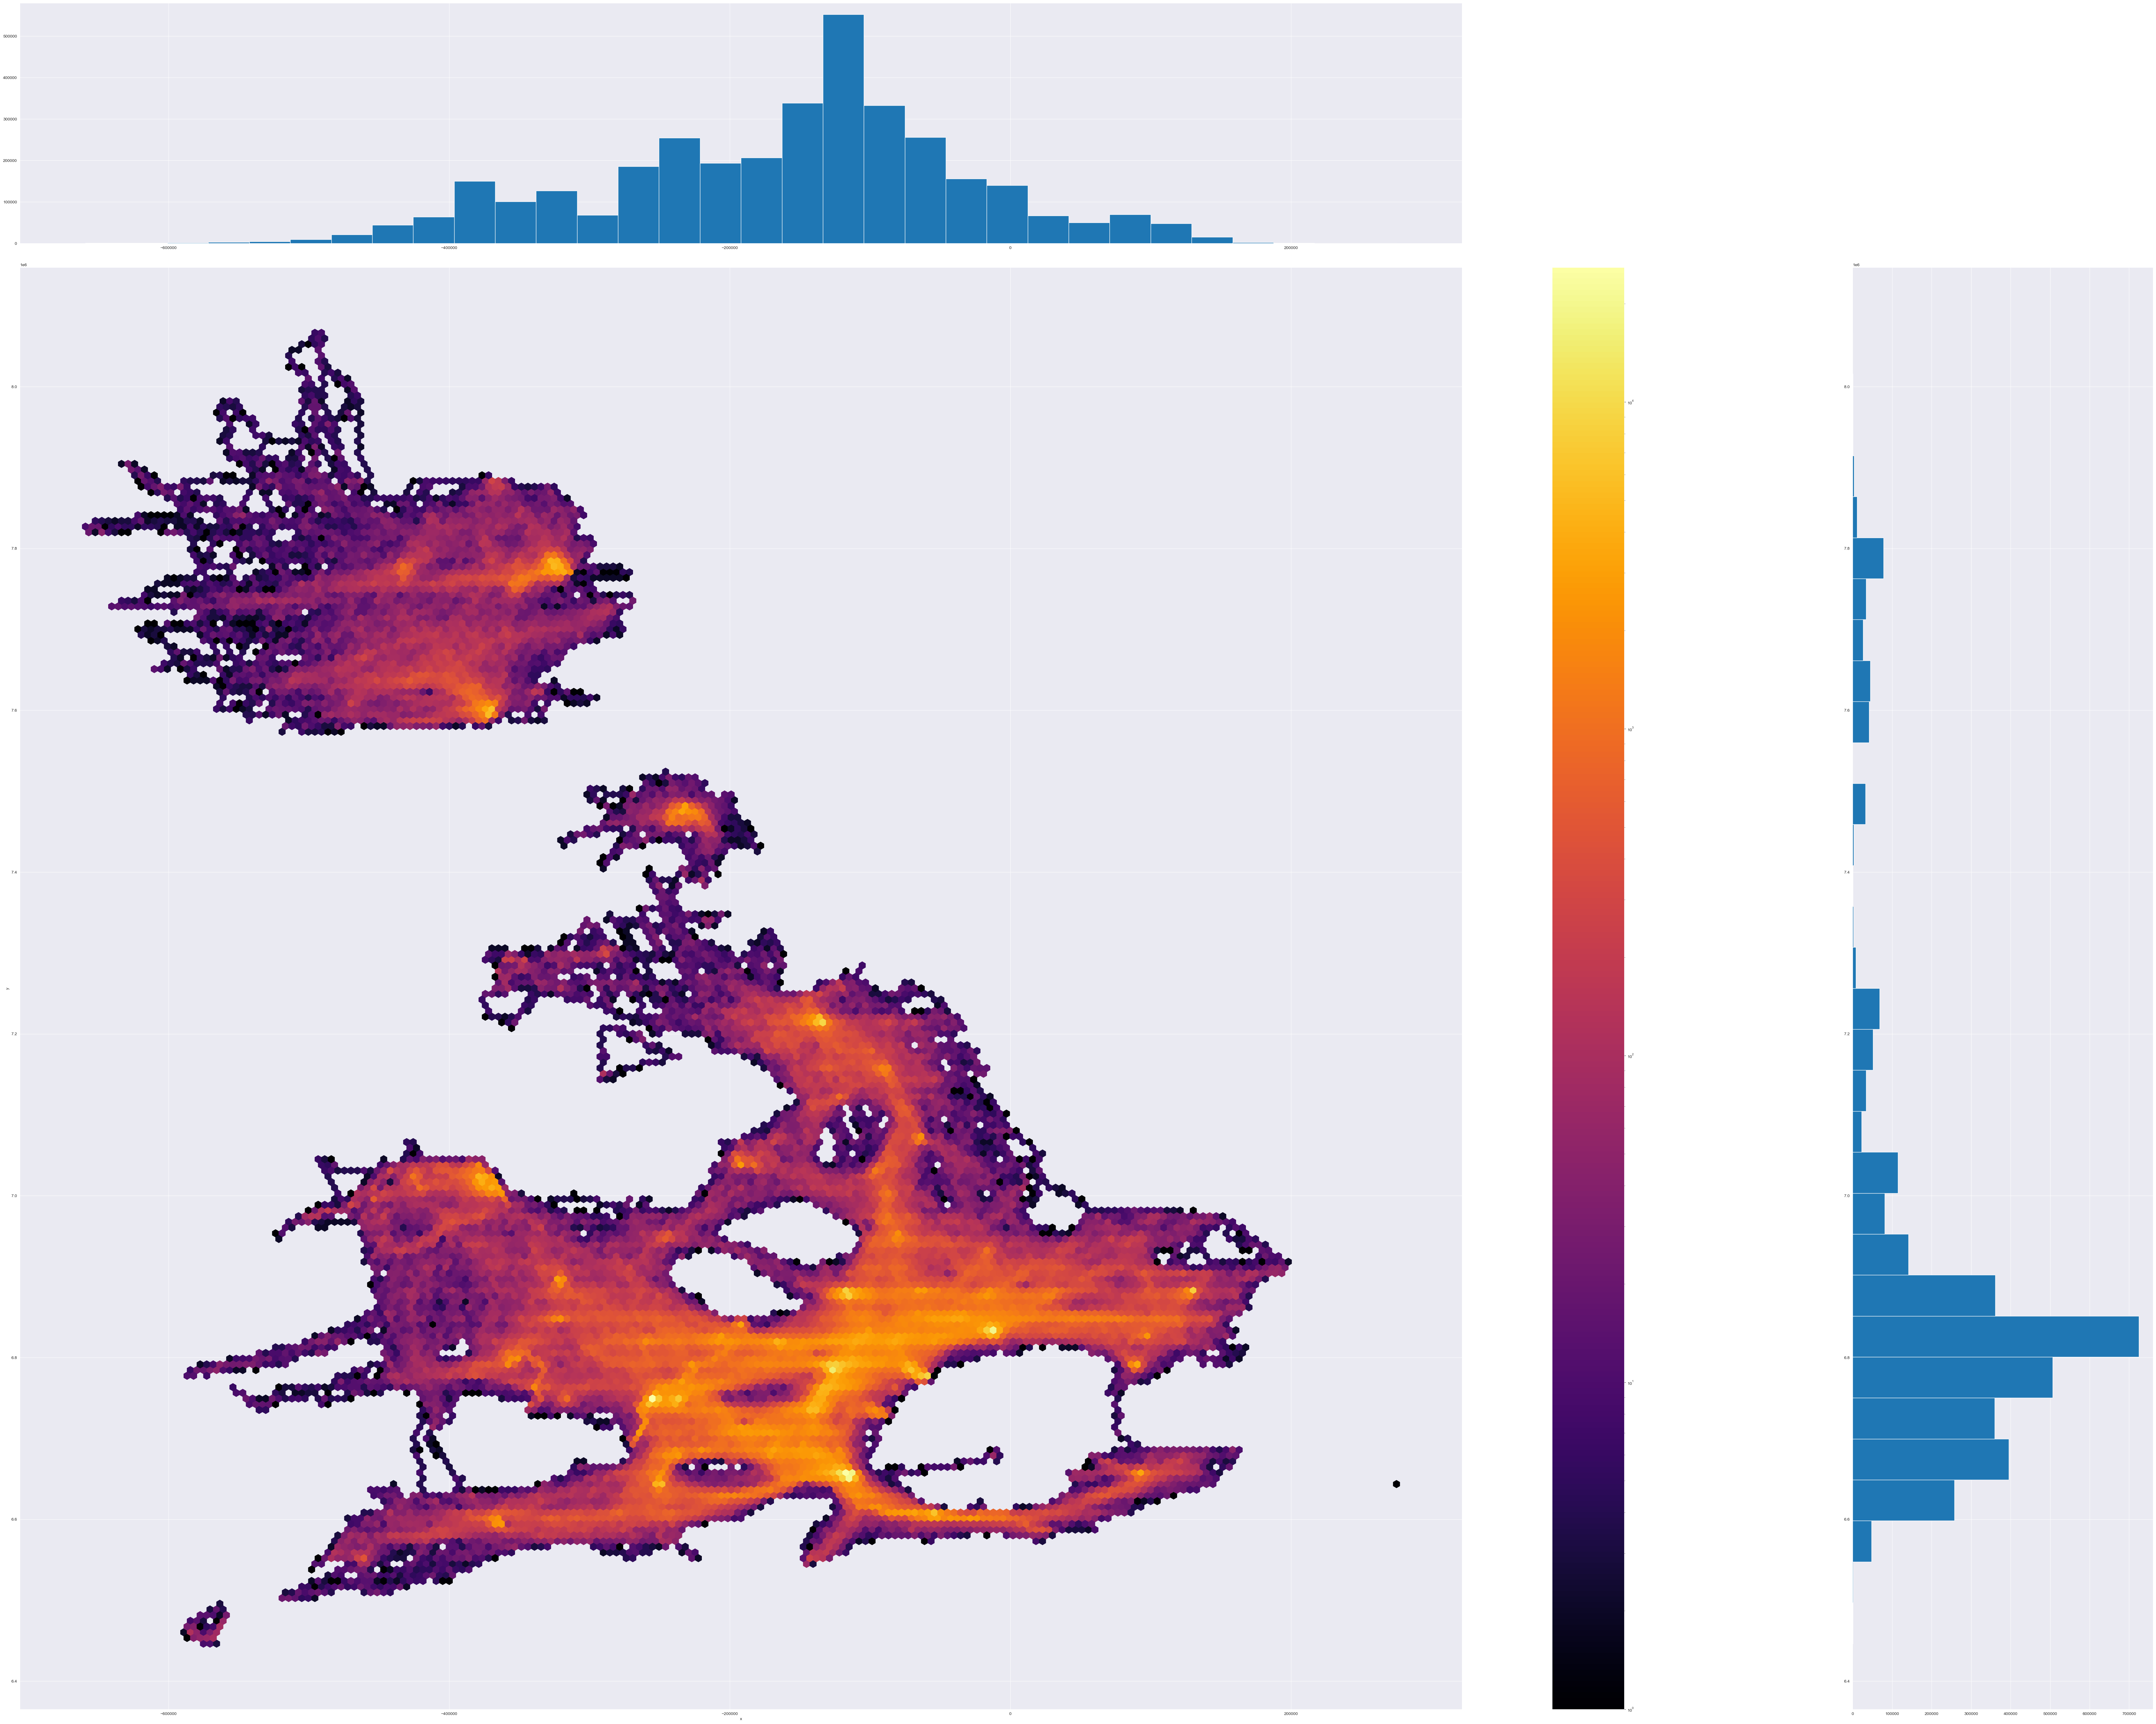

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 6, 6])
axx = fig.add_axes([0, 6.1, 4.8, 1], sharex=ax)
axy = fig.add_axes([6.1, 0, 1, 6], sharey=ax)
tfc_xy.data.plot('x', 'y', kind='hexbin', gridsize=200, bins='log', ax=ax, cmap='inferno')
tfc_xy.data['x'].hist(ax=axx, bins=32)
tfc_xy.data['y'].hist(ax=axy, orientation='horizontal', bins=32)

C:\Users\Aliak\AppData\Local\Temp\ipykernel_34000\1917969340.py:34: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = fig.colorbar(pcm)


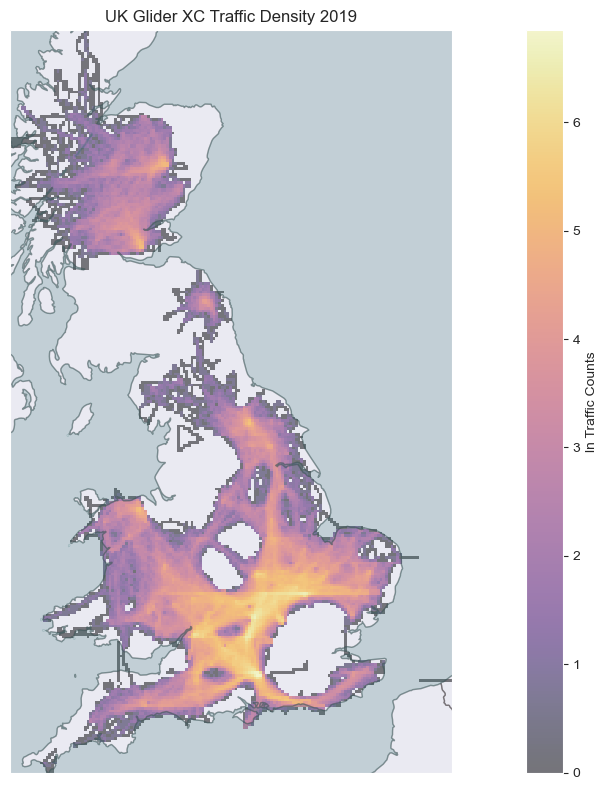

In [21]:
from cartes.crs import LambertConformal, EPSG_27700, PlateCarree, EuroPP, Mercator, Projection
from traffic.drawing import countries, lakes, ocean
from traffic.data import airports
bounds = (-2.9, 1.5, 50.5, 51.9)

fig, ax = plt.subplots(
    1, 1, figsize=(15,8), subplot_kw=dict(projection=Projection('epsg:3857')),
)

ax.add_feature(countries())
ax.add_feature(lakes())
ax.add_feature(ocean())
# ax.set_extent(bounds)
# ax.set_global()
tfc_magg = tfc_agg

xs = np.sort(tfc_magg['flight_id_nunique'].reset_index()['x'].unique().astype(int))
ys = np.sort(tfc_magg['flight_id_nunique'].reset_index()['y'].unique().astype(int))

pcm = ax.pcolormesh(xs, ys, np.log(tfc_magg['flight_id_nunique'].reset_index().pivot_table('flight_id_nunique', 'y', 'x', fill_value=np.nan))
, cmap='inferno', alpha=0.5)

# ax.add_geometries([traj_poly], 'epsg:3857', facecolor='red', edgecolor='red', alpha=0.3)

# airports['EGHL'].point.plot(ax, alpha=0.2)
# airports['EGTK'].point.plot(ax, alpha=0.2)
# airports['EGKA'].point.plot(ax, alpha=0.2)
# airports['EGMD'].point.plot(ax, alpha=0.2)
# airports['EGTB'].point.plot(ax, alpha=0.2)
# airports['EGHO'].point.plot(ax, alpha=0.2)
# airports['EGBP'].point.plot(ax, alpha=0.2)
# airports['EGKH'].point.plot(ax, alpha=0.2)

cb = fig.colorbar(pcm)
cb.set_label('ln Traffic Counts')
ax.set_title('UK Glider XC Traffic Density 2019')

fig.tight_layout()
fig.savefig('glider_xc_2019.png')

In [17]:
tfc_agg

altitude_mean  altitude_std  flight_id_nunique
x         y                                                        
-660000.0 7812000.0        3624.00     32.952491                  1
          7824000.0        3682.00    147.540415                  1
          7830000.0        3988.00      8.485281                  1
-654000.0 7812000.0        2652.00    249.350208                  1
          7824000.0        3062.00    439.932679                  1
...                            ...           ...                ...
 192000.0 6906000.0        1038.00    184.574069                  4
          6912000.0        1081.00    223.019535                  1
          6918000.0         979.00    197.934754                  2
 198000.0 6912000.0        1343.00           NaN                  1
 270000.0 6642000.0         219.75           NaN                  1

[10454 rows x 3 columns]